**20164245 Hong Jin**

Let $f(x)$ be a color image and $x$ be the index of image in the domain.
The values of image $f(x)$ consist of [red, green, blue] intensity.

Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.


# Load Image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

image = cv2.imread("clash.png")
im_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = im_color.shape[:2]
im_label = np.zeros((height, width), dtype = int)
E = []

# Initial Image

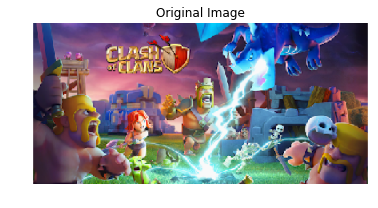

In [2]:
plt.title('Original Image')
plt.imshow(im_color)
plt.axis('off')
plt.show()

# Nomalization

In [3]:
def normalize(data):
    
    data_normalized = (data - min(data)) / (max(data) - min(data))
    
    return(data_normalized)

# Compute distance based on L2-norm (x, y)

$$||x-y||_{2} = \sqrt{x^2 + y^2} $$

In [4]:
def distance(x,y):
    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)
    
    return r

# Initialize Label

initialize all images with random label

In [5]:
def initialLabel(cluster_num):
    for i in range(height):
        for j in range(width):
            initial_num = random.randrange(0, cluster_num)
            im_label[i][j] = initial_num
    
    return im_label

# Initialize Centroid

In [6]:
def initialCentroid(im_average, cluster_num, im_label, im_count):
    for i in range(height):
        for j in range(width):
            im_average[im_label[i,j]] += im_color[i,j]
            im_count[im_label[i,j]] += 1
    
    for i in range(cluster_num):
        im_average[i] /= im_count[i]
    
    return im_average, im_count

# Plot the Final Image

Plot initial and final image

In [7]:
def plot_average(im_average, im_count, cluster_num):
    f1 = plt.figure(1)
    new_image = im_color.copy()
    
    for i in range(height) :
        for j in range(width):
            new_image[i][j] = im_average[im_label[i][j]]

    plt.title('Final Image')
    plt.imshow(new_image)
    plt.axis('off')
    plt.show()

# Clustering

In [8]:
def clustering(im_label, cluster_num, im_average):
    dist = []
    for i in range(height):
        for j in range(width): 
            dist.clear()
            for k in range(cluster_num): 
                x = im_color[i,j]
                y = im_average[k]
                dist.append(distance(x, y))
            im_label[i][j] = np.argmin(dist)
    
    return im_label

# Compute Centroid

In [9]:
def computeCentroid(cluster_num, im_label):
    num = np.zeros((cluster_num), dtype = int)
    c = np.zeros((cluster_num, 3), dtype = float)
    
    for i in range(height):
        for j in range(width):
            c[im_label[i][j]] += im_color[i][j]
            num[im_label[i][j]] += 1 
            
    for k in range(cluster_num):
        if num[k] != 0:
            c[k] /= num[k]
    return c

# Compute Energy

$E=\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2,$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

In [10]:
def computeEnergy(im_label, cluster_num, im_average):
    total_sum = 0
    num = 0
    for i in range(height):
        for j in range(width):
            total_sum += sum((im_color[i,j] - im_average[im_label[i][j]]) ** 2)
            num += 1
    
    total_sum /= num
    return total_sum

# Initialize Cluster

In [11]:
def initialCluster(cluster_num):
    im_average = np.zeros((cluster_num,3), dtype=float)
    im_count = np.zeros(cluster_num, dtype=int)

    im_label = initialLabel(cluster_num)

    im_average, im_count = initialCentroid(im_average, cluster_num, im_label, im_count)
    
    E.clear()
    
    return im_average, im_count, im_label

# Clustering until no change

no change means energy is maintained

In [17]:
def iteration(cluster_num, im_average, im_count, im_label):
    iter_num = 0
    while True:
        im_label = clustering(im_label, cluster_num, im_average)
        im_average = computeCentroid(cluster_num, im_label)
        E.append(computeEnergy(im_label, cluster_num, im_average))
        
        if iter_num == 20 :
            #if E[iter_num -1] == E[iter_num]:
                break
        iter_num += 1

    plot_average(im_average, im_count, cluster_num)
    return iter_num

# Energy graph per each iteration

In [13]:
def drawEnergy(iter_num):
    plt.figure(3)
    x_range = np.arange(iter_num+1)
    plt.plot(x_range, E, "g")
    plt.title("Energy")
    plt.grid(True)
    plt.show()

# K = 3

## Final average image

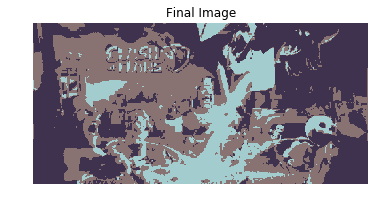

In [14]:
im_average, im_count, im_label = initialCluster(3)
iter_num = iteration(3,im_average, im_count, im_label)

## Energy graphs

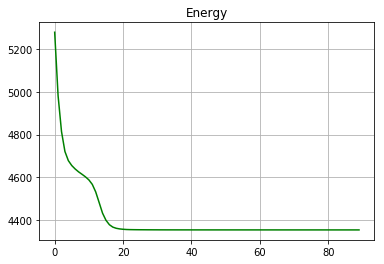

In [15]:
drawEnergy(iter_num)

# K = 5

## Final average image

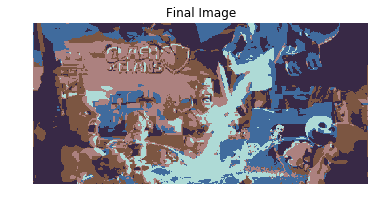

In [18]:
im_average, im_count, im_label = initialCluster(5)
iter_num = iteration(5,im_average, im_count, im_label)

## Energy graphs

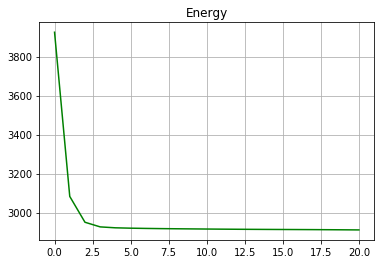

In [19]:
drawEnergy(iter_num)

# K = 10

## Final average image

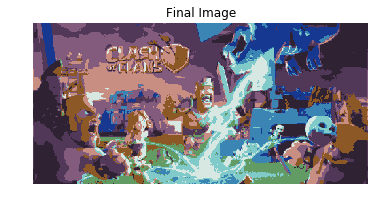

In [20]:
im_average, im_count, im_label = initialCluster(10)
iter_num = iteration(10,im_average, im_count, im_label)

## Energy graphs

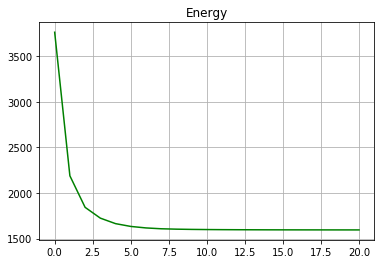

In [21]:
drawEnergy(iter_num)

# K = 15

## Final average image

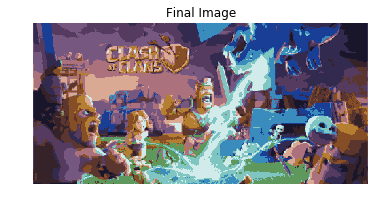

In [22]:
im_average, im_count, im_label = initialCluster(15)
iter_num = iteration(15,im_average, im_count, im_label)

## Energy graphs

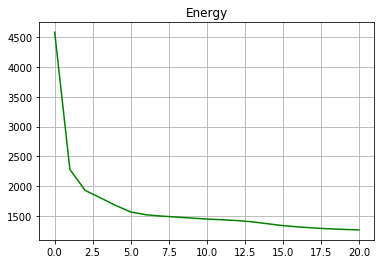

In [23]:
drawEnergy(iter_num)